# Refugee resettlement in the USA `13 points`

Source: https://www.refugeeresettlementdata.com/data.html

As described in [Data Is Plural](https://www.data-is-plural.com/archive/2021-07-14-edition/)

> Axel Dreher et al. have published person-level data on 2.5+ million refugees who arrived in the US between 1975 and 2008. The anonymized records, obtained from the National Archives and originally collected by the Office of Refugee Resettlement, indicate each refugee’s country and date of birth, marital and family status, education level and English proficiency, date of US arrival, US city of resettlement, and more. The researchers also combined these records with public reports from the Bureau of Population, Refugees, and Migration (DIP 2015.11.25) to create a geocoded dataset of annual resettlements by citizenship and destination city from 1975 to 2018.

### Topis covered

* Aggregating
* Filtering
* Unfriendly complexity in data
* Exploratory visualization
* FIPS codes
* Mapping

# Basic analysis `4 points`

### Read in your data

We'll be using the geocoded file, which comes as a `dta` file. A `.dta` file is technically an export from [STATA](https://www.stata.com/), which means you use `pd.read_stata` to bring it in – but otherwise it's the same as a CSV.

In [2]:
import pandas as pd

In [3]:
df = pd.read_stata('orr_prm_1975_2018_v1.dta')

df

,city_id,city_nat_id,city_nat_year_id,year,citizenship_stable,refugees,city,city_code,county_fips,state_fips,fips,county10name,countyfp10,statefp10,geo_level,longitude,latitude,id_merging
0,1.0,1.0,1.0,1983,afghanistan,17.0,Honolulu,17000.0,003,15,15003,Honolulu,003,15,city,-157.855676,21.304547,1.0
1,1.0,1.0,2.0,1984,afghanistan,11.0,Honolulu,17000.0,003,15,15003,Honolulu,003,15,city,-157.855676,21.304547,2.0
2,1.0,1.0,3.0,1987,afghanistan,2.0,Honolulu,17000.0,003,15,15003,Honolulu,003,15,city,-157.855676,21.304547,3.0
3,1.0,1.0,4.0,1988,afghanistan,1.0,Honolulu,17000.0,003,15,15003,Honolulu,003,15,city,-157.855676,21.304547,4.0
4,1.0,2.0,5.0,1983,bulgaria,1.0,Honolulu,17000.0,003,15,15003,Honolulu,003,15,city,-157.855676,21.304547,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140498,15238.0,45341.0,139537.0,2011,somalia,8.0,Hampton,NaN,650,51,51650,Hampton City,650,51,city,-76.360123,37.034946,NaN
140499,15238.0,45341.0,139538.0,2013,somalia,15.0,Hampton,NaN,650,51,51650,Hampton City,650,51,city,-76.360123,37.034946,NaN
140500,15238.0,45341.0,139539.0,2014,somalia,2.0,Hampton,NaN,650,51,51650,Hampton City,650,51,city,-76.360123,37.034946,NaN
140501,15238.0,45342.0,139540.0,2012,sudan,9.0,Hampton,NaN,650,51,51650,Hampton City,650,51,city,-76.360123,37.034946,NaN


### What years does this dataset include?

In [4]:
df['year'].unique()

array([1983, 1984, 1987, 1988, 1999, 2001, 2003, 2004, 2005, 2008, 1975,
       1979, 1980, 1981, 1982, 1985, 1989, 2002, 1986, 1993, 1977, 1978,
       1991, 1992, 1996, 1990, 1994, 1995, 1997, 1998, 2000, 2006, 2007,
       2015, 2013, 2014, 1976, 2009, 2011, 2016, 2010, 2012, 2017, 2018],
      dtype=int16)

### According to this dataset, what are the top 5 countries for refugees resettled into the United States?

In [5]:
df.groupby('citizenship_stable').sum()['refugees'].sort_values(ascending=False).head(5)

citizenship_stable
vietnam       816540.0
ussr          506997.0
laos          244136.0
iraq          177425.0
yugoslavia    167711.0
Name: refugees, dtype: float32

### Why can't I use `.value_counts()` to tell me how many refugees came from each country?

**ANSWER**: `value_counts()` would count the occurrence of countries in rows. However, every row brings the number of refugees *per year*. Therefore, the method `value_counts()` is not useful in this case because we need to sum the number of refugees across the years. 

### What are the top 5 cities for resettling refugees?

In [6]:
df.groupby('city').sum()['refugees'].sort_values(ascending=False).head(5)

city
Brooklyn       94611.0
Los Angeles    87116.0
Houston        72119.0
Chicago        67413.0
San Diego      58238.0
Name: refugees, dtype: float32

### Surprise, you got tricked! You can't just use `city` to answer that question. Why?

It will help if you try to look at all of the rows for the city of Brooklyn.

In [7]:
df[df['city']=='Brooklyn']

,city_id,city_nat_id,city_nat_year_id,year,citizenship_stable,refugees,city,city_code,county_fips,state_fips,fips,county10name,countyfp10,statefp10,geo_level,longitude,latitude,id_merging
56400,5139.0,16074.0,55809.0,1999,ethiopia,11.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45388.0
56401,5139.0,16074.0,55810.0,2000,ethiopia,4.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45389.0
56402,5139.0,16074.0,55811.0,2004,ethiopia,10.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45390.0
56403,5139.0,16075.0,55812.0,1983,laos,7.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45391.0
56404,5139.0,16075.0,55813.0,2005,laos,2.0,Brooklyn,7930.0,137,27,27137,St. Louis,137,27,city,-92.921021,47.439654,45392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137130,14857.0,44199.0,136177.0,1986,iran,1.0,Brooklyn,9210.0,021,25,25021,Norfolk,021,25,city,-71.110893,42.335499,111229.0
137131,14857.0,44200.0,136178.0,1988,ussr,5.0,Brooklyn,9210.0,021,25,25021,Norfolk,021,25,city,-71.110893,42.335499,111230.0
137132,14857.0,44201.0,136179.0,1978,vietnam,1.0,Brooklyn,9210.0,021,25,25021,Norfolk,021,25,city,-71.110893,42.335499,111231.0
137133,14857.0,44201.0,136180.0,1980,vietnam,1.0,Brooklyn,9210.0,021,25,25021,Norfolk,021,25,city,-71.110893,42.335499,111232.0


### What is the correct answer for the top 5 cities for resettling refugees?

Spoiler: I recommend using both `city` *and* `city_id` every time you want to look at individual cities. Also: it might be the same answer, but the numbers will be a little different.

In [8]:
df.groupby(['city','city_id']).sum()['refugees'].sort_values(ascending=False).head(5)

city         city_id
Brooklyn     13433.0    94096.0
Los Angeles  1609.0     84202.0
Chicago      7094.0     56712.0
Houston      4198.0     54324.0
San Diego    2046.0     45724.0
Name: refugees, dtype: float32

### Comparing cities

Pick 3 cities in the United States - one on the east coast, one on the west coast, and one somewhere in between. What are the top 10 countries for refugees for each? Be sure to use `city_id`.

In [153]:
cities = ['New York','Los Angeles','Denver']
city_ids = df[df['city'].isin(cities)].city_id.unique()
citiesbyids=df[df['city_id'].isin(city_ids)]

# Considering these IDs, note that we have "New York", "New  York" and "Burbank
citiesbyids.city.unique()

array(['Los Angeles', 'Denver', 'Burbank', 'New York', 'New  York'],
      dtype=object)

In [154]:
groupcols = ['city','citizenship_stable']
rank = pd.DataFrame(citiesbyids.groupby(by=groupcols,sort=True).sum()['refugees'])
rank

refugees
city     citizenship_stable          
Burbank  iran                     6.0
         ussr                     2.0
         vietnam                  5.0
Denver   afghanistan            313.0
         albania                  9.0
...                               ...
New York unknown                 51.0
         ussr                 24998.0
         vietnam               7322.0
         yemen                   64.0
         yugoslavia            1061.0

[176 rows x 1 columns]

In [155]:
rank.sort_values(['city','refugees'],ascending=False).groupby('city').head(10)

refugees
city        citizenship_stable          
New York    ussr                 24998.0
            vietnam               7322.0
            poland                2612.0
            cambodia              2404.0
            iran                  2120.0
            romania               1454.0
            yugoslavia            1061.0
            afghanistan            557.0
            ethiopia               494.0
            burma                  484.0
New  York   somalia                  1.0
Los Angeles vietnam              39808.0
            ussr                 22332.0
            iran                  8725.0
            cambodia              6461.0
            laos                  4111.0
            romania                963.0
            ethiopia               928.0
            poland                 591.0
            afghanistan            589.0
            iraq                   558.0
Denver      vietnam               5067.0
            ussr                  3786.0
            burma                 3062.0
            bhutan                2621.0
            laos                  2260.0
            somalia               2187.0
            iraq                  1842.0
            yugoslavia            1270.0
            dem. rep. congo       1112.0
            ethiopia               974.0
Burbank     iran                     6.0
            vietnam                  5.0
            ussr                     2.0

### Where were refugees from Afghanistan resettled before 2000 as compared to after 2000?

In [122]:
# rank.groupby(by=groupcols).describe()

rank.groupby(by=groupcols).sum().sort_values(by='refugees').tail(10)

refugees
city        citizenship_stable          
Denver      iran                      34
Los Angeles vietnam                   34
            iran                      35
New York    vietnam                   37
Denver      ethiopia                  37
New York    iran                      42
Denver      vietnam                   45
Los Angeles ussr                      50
Denver      ussr                      76
New York    ussr                      82

### Exploratory line charts `1 point`

**Using line charts,** examine 3 different countries' patterns of entry into the US over the years. What do their entry trends look like over time?

In [178]:
countries['citizenship_stable'].unique()

array(['afghanistan', 'albania', 'algeria', 'angola', 'antigua',
       'argentina', 'austria', 'bahrain', 'bangladesh', 'belgium',
       'benin', 'bhutan', 'botswana', 'brunei', 'bulgaria',
       'burkina faso (uvolta)', 'burma', 'burundi', 'cambodia',
       'cameroon', 'canada', 'central african republic', 'chad', 'china',
       'colombia', 'congo', 'costa rica', 'cuba', 'czechoslovakia',
       'dem. rep. congo', 'djibouti', 'ecuador', 'egypt', 'el salvador',
       'equatorial guinea', 'eritrea', 'ethiopia', 'gabon', 'gambia',
       'germany', 'ghana', 'greece', 'guatemala', 'guinea',
       'guinea - bissau', 'haiti', 'honduras', 'hungary', 'iceland',
       'india', 'indonesia', 'iran', 'iraq', 'ireland', 'israel', 'italy',
       'ivory coast', 'jamaica', 'jordan', 'kenya', 'korea, north',
       'kuwait', 'laos', 'lebanon', 'lesotho', 'liberia', 'libya',
       'liechtenstein', 'macao', 'madagascar (malagasy republic)',
       'malawi', 'malaysia', 'maldives', 'mali', 'mau

<AxesSubplot:xlabel='year'>

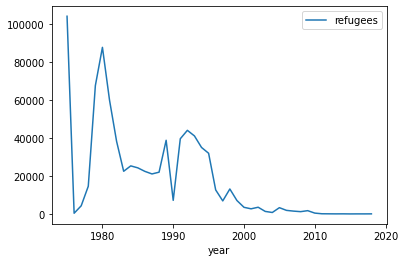

In [181]:
#  just use the original dataframe along with groupby+sum and plot.
countries = pd.DataFrame(df.groupby(['citizenship_stable','year']).sum()['refugees']).reset_index()

countries[countries['citizenship_stable'] == 'vietnam'].plot('year','refugees')

<AxesSubplot:xlabel='year'>

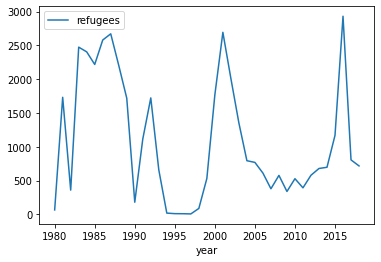

In [176]:
countries[countries['citizenship_stable'] == 'afghanistan'].plot('year','refugees')

<AxesSubplot:xlabel='year'>

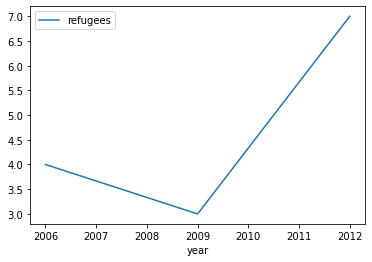

In [177]:
countries[countries['citizenship_stable'] == 'venezuela'].plot('year','refugees')

### DataWrapper charts with annotations `2 points`

Using [DataWrapper](https://www.datawrapper.de/), make a line chart of one of the countries' refugees inflow over the years. **Use the annotation tool to note event(s) that caused an influx of refugees.**

Link the chart in the cell below.

**ANSWEER**: [https://datawrapper.dwcdn.net/Ej49F/1/](https://datawrapper.dwcdn.net/Ej49F/1/)

In [184]:
countries[countries['citizenship_stable'] == 'afghanistan'].to_csv('afghan.csv',index=False)

### What are the top seven states for refugee resettlement in the USA? `1 point`

Trying to use a CSV of FIPS codes and state names never works out well, I recommend doing cleaning that up manually.

In [206]:
# I am not sure how we are supposed to clean this dataset manually, so I will use the 'statefp10' code
states = df.groupby(by=['statefp10']).sum()['refugees'].reset_index()
abbrev = pd.read_html('https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696',converters={'FIPS': str})[0]
abbrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         56 non-null     object
 1   Postal Code  55 non-null     object
 2   FIPS         55 non-null     object
dtypes: object(3)
memory usage: 1.4+ KB


In [208]:
pd.merge(states,abbrev,left_on='statefp10',right_on='FIPS').sort_values(by='refugees',ascending=False).head(10)


,statefp10,refugees,Name,Postal Code,FIPS
4,06,654041.0,California,CA,06
31,36,297938.0,New York,NY,36
42,48,218367.0,Texas,TX,48
46,53,141958.0,Washington,WA,53
8,12,126448.0,Florida,FL,12
12,17,121792.0,Illinois,IL,17
37,42,108461.0,Pennsylvania,PA,42
22,27,105575.0,Minnesota,MN,27
9,13,87851.0,Georgia,GA,13
21,26,86269.0,Michigan,MI,26


### Mapping refugees, level 1 `2 point`

Make a state-based choropleth of where refugees from a given country (your choice) have been resettled in the USA.

Use the tool of your choice: DataWrapper, MapShaper, or QGIS.

**ANSWER:** [https://datawrapper.dwcdn.net/A85FB/1/](https://datawrapper.dwcdn.net/A85FB/1/)

In [223]:
# https://datawrapper.dwcdn.net/A85FB/1/
afghan = df[df['citizenship_stable'] == 'afghanistan']

afg_states = pd.merge(afghan,abbrev,left_on='statefp10',right_on='FIPS')

afg_rank = pd.DataFrame(afg_states.groupby(by=['Name','Postal Code']).sum()['refugees']).reset_index()

afg_rank.to_csv('afg_rank.csv',index=False)

afg_rank.head()


,Name,Postal Code,refugees
0,Alabama,AL,103.0
1,Alaska,AK,7.0
2,Arizona,AZ,2077.0
3,Arkansas,AR,16.0
4,California,CA,11081.0


In [222]:
afghan.year.sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018], dtype=int16)

### Mapping refugees, level 2 `3 points`

Make an animated map or a grid of maps of where refugees from a given country have been resettled in the USA.

Use the tool of your choice: DataWrapper, MapShaper, or QGIS.

> **Tip:** Depending on the tool you use, you might want either long or wide data. Using `.reset_index()` will give you long data, `.unstack()` will give you wide data.

**ANSWER**: Please check the files in maps/pngs.

In [224]:
afghan = df[df['citizenship_stable'] == 'afghanistan']

afg_states = pd.merge(afghan,abbrev,left_on='statefp10',right_on='FIPS')

afg_rank = pd.DataFrame(afg_states.groupby(by=['Name','Postal Code','year']).sum()['refugees']).reset_index()

afg_rank.to_csv('afg_rank_yrly.csv',index=False)

afg_rank.head()


,Name,Postal Code,year,refugees
0,Alabama,AL,1983,15.0
1,Alabama,AL,1984,14.0
2,Alabama,AL,1985,6.0
3,Alabama,AL,2002,10.0
4,Alabama,AL,2003,5.0
